In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('student-mat.csv')

In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [5]:
print(data.describe())

              age        Medu        Fedu  traveltime   studytime    failures  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean    16.696203    2.749367    2.521519    1.448101    2.035443    0.334177   
std      1.276043    1.094735    1.088201    0.697505    0.839240    0.743651   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     3.944304    3.235443    3.108861    1.481013    2.291139    3.554430   
std      0.896659    0.9988

In [6]:
print(data.isnull().sum())

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


In [7]:
encoded_data = pd.get_dummies(data, drop_first=True)

In [8]:
print(encoded_data.head(10))

   age  Medu  Fedu  traveltime  studytime  failures  famrel  freetime  goout  \
0   18     4     4           2          2         0       4         3      4   
1   17     1     1           1          2         0       5         3      3   
2   15     1     1           1          2         3       4         3      2   
3   15     4     2           1          3         0       3         2      2   
4   16     3     3           1          2         0       4         3      2   
5   16     4     3           1          2         0       5         4      2   
6   16     2     2           1          2         0       4         4      4   
7   17     4     4           2          2         0       4         1      4   
8   15     3     2           1          2         0       4         2      2   
9   15     3     4           1          2         0       5         5      1   

   Dalc  ...  guardian_mother  guardian_other  schoolsup_yes  famsup_yes  \
0     1  ...             True           Fal

In [9]:
print(encoded_data.isnull().sum())

age                  0
Medu                 0
Fedu                 0
traveltime           0
studytime            0
failures             0
famrel               0
freetime             0
goout                0
Dalc                 0
Walc                 0
health               0
absences             0
G1                   0
G2                   0
G3                   0
school_MS            0
sex_M                0
address_U            0
famsize_LE3          0
Pstatus_T            0
Mjob_health          0
Mjob_other           0
Mjob_services        0
Mjob_teacher         0
Fjob_health          0
Fjob_other           0
Fjob_services        0
Fjob_teacher         0
reason_home          0
reason_other         0
reason_reputation    0
guardian_mother      0
guardian_other       0
schoolsup_yes        0
famsup_yes           0
paid_yes             0
activities_yes       0
nursery_yes          0
higher_yes           0
internet_yes         0
romantic_yes         0
dtype: int64


In [10]:
selected_features = ['G1', 'G2','G3', 'studytime', 'failures', 'absences', 'goout']
df_selected = encoded_data[selected_features].copy()

print(df_selected.head())

   G1  G2  G3  studytime  failures  absences  goout
0   5   6   6          2         0         6      4
1   5   5   6          2         0         4      3
2   7   8  10          2         3        10      2
3  15  14  15          3         0         2      2
4   6  10  10          2         0         4      2


In [11]:
df_selected['avg_grade'] = (encoded_data['G1'] + encoded_data['G2']) / 2
df_selected['engagement_score'] = encoded_data['studytime'] - encoded_data['goout']
print(df_selected.head(20))

    G1  G2  G3  studytime  failures  absences  goout  avg_grade  \
0    5   6   6          2         0         6      4        5.5   
1    5   5   6          2         0         4      3        5.0   
2    7   8  10          2         3        10      2        7.5   
3   15  14  15          3         0         2      2       14.5   
4    6  10  10          2         0         4      2        8.0   
5   15  15  15          2         0        10      2       15.0   
6   12  12  11          2         0         0      4       12.0   
7    6   5   6          2         0         6      4        5.5   
8   16  18  19          2         0         0      2       17.0   
9   14  15  15          2         0         0      1       14.5   
10  10   8   9          2         0         0      3        9.0   
11  10  12  12          3         0         4      2       11.0   
12  14  14  14          1         0         2      3       14.0   
13  10  10  11          2         0         2      3       10.

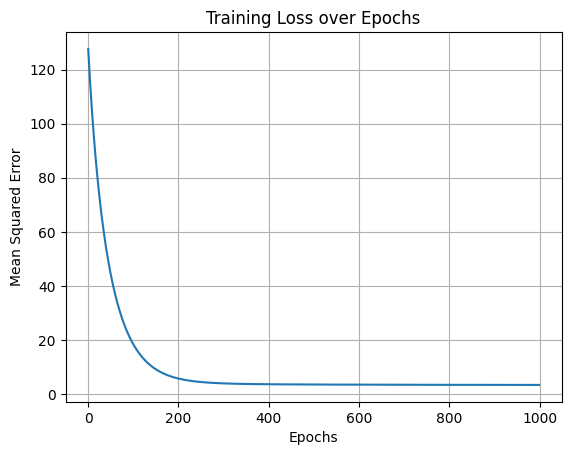

Mean Squared Error (MSE): 4.63
Root Mean Squared Error (RMSE): 2.15
R² Score: 0.77


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

features = ['G1', 'G2', 'studytime', 'failures', 'absences', 'avg_grade', 'engagement_score']
target = 'G3'

x = df_selected[features].values
y = df_selected[target].values

X = (x - x.mean(axis=0)) / x.std(axis=0)

X = np.c_[np.ones(X.shape[0]), X]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def fit(X, y, learning_rate=0.01, epochs=1000):
    weights = np.zeros(X.shape[1])
    losses = []

    for i in range(epochs):
        y_pred = X.dot(weights)
        error = y_pred - y
        loss = (error ** 2).mean()
        losses.append(loss)

        gradient = X.T.dot(error) / X.shape[0]
        weights -= learning_rate * gradient

    return weights, losses

def predict(X, weights):
    return X.dot(weights)

weights, losses = fit(X_train, y_train, learning_rate=0.01, epochs=1000)

plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error")
plt.title("Training Loss over Epochs")
plt.grid(True)
plt.show()

y_test_pred = predict(X_test, weights)

mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_test_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

x = df_selected[features].values
y = df_selected[target].values

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled,y_train)

y_pred = model.predict(X_test_scaled)

print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)

Intercept: 10.325949367088608
Coefficients: [-0.2522873   2.85872004  0.08750337 -0.34725706  0.33084781  1.48636183
 -0.23359508]
Mean Squared Error: 4.637454117855932
R² Score: 0.7738384087961517


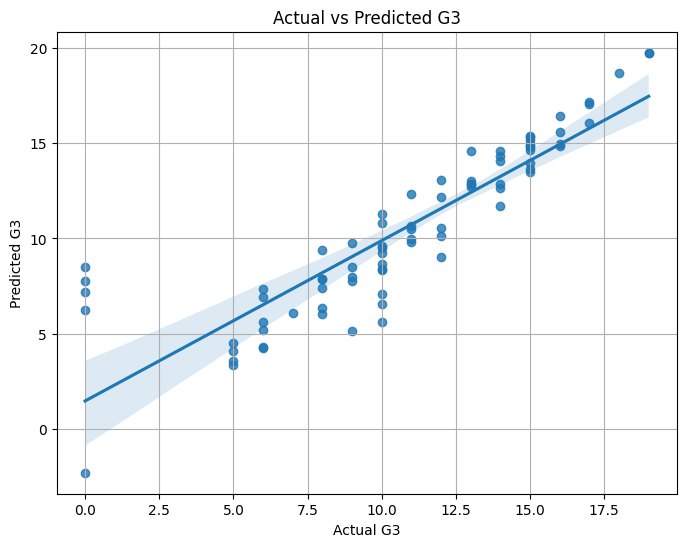

In [15]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.regplot(x=y_test, y=y_pred)
plt.xlabel('Actual G3')
plt.ylabel('Predicted G3')
plt.title('Actual vs Predicted G3')
plt.grid(True)
plt.show()

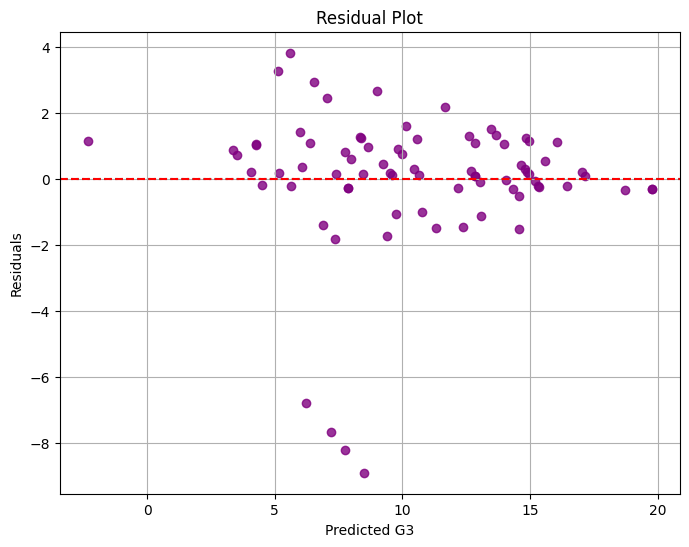

In [30]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
sns.residplot(x=y_pred, y=residuals, color="purple")
plt.xlabel('Predicted G3')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.axhline(0, color='red', linestyle='--')
plt.show()

In [31]:
from sklearn.preprocessing import PolynomialFeatures


poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(X_train)
x_test_ploy = poly.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(x_train_poly,y_train)

y_pred_poly = poly_model.predict(x_test_ploy)


mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print("MSE:", mse_poly)
print("R² Score:", r2_poly)

MSE: 4.820812174348859
R² Score: 0.7648963149742817


In [34]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def evaluate_model(y_true, y_pred, model_name="Model"):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print(f" Evaluation Metrics for {model_name}:")
    print(f"  . MSE  = {mse:.4f}")
    print(f"  . RMSE = {rmse:.4f}")
    print(f"  . MAE  = {mae:.4f}")
    print(f"  . R²   = {r2:.4f}\n")


In [35]:
evaluate_model(y_test, y_pred, "Linear Regression")

evaluate_model(y_test, y_pred_poly, "Polynomial Regression (Degree 2)")


 Evaluation Metrics for Linear Regression:
  . MSE  = 4.6375
  . RMSE = 2.1535
  . MAE  = 1.3786
  . R²   = 0.7738

 Evaluation Metrics for Polynomial Regression (Degree 2):
  . MSE  = 4.8208
  . RMSE = 2.1956
  . MAE  = 1.4237
  . R²   = 0.7649



In [36]:
import joblib

joblib.dump(model,'linear_model.pkl')

['linear_model.pkl']